# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2022/2023

Ten notatnik zalicza się do grupy zestawów zadań, na podstawie których odbywa się zaliczenie ćwiczeń i podlega zwrotowi do oceny w ustalonym na zajęciach terminie.

Uwagi ogólne:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> ` # YOUR CODE HERE`<br/> ` raise NotImplementedError()`<br/> Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Jeżeli zestaw zadań wymaga skorzystania z funkcji przygotowanych w ramach wcześniejszych zestawów zadań należy je umieścić we wskazanej komórce.
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, mieć nadane tytuły, opisane osie oraz odpowiednio dobrany rozmiar, wielkość punktów i grubość linii. Proporcje osi wykresów przedstawiających rozkłady punktów powinny być dobrane tak, aby wykresy odzwierciedlały rzeczywisty rozkład punktów w przestrzeni.
- Zadania, które powodują wyświetlenie komunikatu o błędzie przerywającym wykonywanie kodu nie podlegają ocenie.

Przed odesłaniem zestawu zadań do oceny proszę uzupełnić komórkę z danymi autorów rozwiązania (`NAME` - nazwa grupy, `COLLABORATORS` - imiona, nazwiska i numery indeksów członków grupy) oraz upewnić się, że notatnik działa zgodnie z oczekiwaniami. W tym celu należy skorzystać z opcji **Restart Kernel and Run All Cells...** dostępnej na górnej belce notatnika pod symbolem $\blacktriangleright\blacktriangleright$. 

---

## Zestaw zadań 5: Badanie relacji między punktami (część 2)

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

<class 'ModuleNotFoundError'>: No module named 'seaborn'

In [3]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów
sns.set() 
sns.set_theme(style="whitegrid")
import math
import random

In [4]:
# Miejsce do wklejenie funkcji ze wcześniejszych zestawów zadań
# YOUR CODE HERE
def homogeneous_poisson_on_rectangle(intensity, x_lim, y_lim):
    """
    Parameters
    -------
    intensity: float
        Liczba dodatnia określająca intensywność procesu punktowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    a = abs(x_lim[1] - x_lim[0]) * abs(y_lim[1] - y_lim[0])
    n = np.random.poisson(intensity*a)
    x = x_lim[0] + (x_lim[1]-x_lim[0]) * np.random.rand(n)
    y = y_lim[0] + (y_lim[1]-y_lim[0]) * np.random.rand(n)
    return pd.DataFrame({'X':x, 'Y':y})

def materna_on_rectangle(parent_intensity, daughter_intensity, cluster_radius, x_lim, y_lim):
    """
    Parameters
    -------
    parent_intensity: float
        Liczba dodatnia określająca intensywność macierzystego procesu punktowego.
    daughter_intensity: float
        Liczba dodatnia określająca intensywność potomnego procesu punktowego.
    cluster_radius: float
        Liczba dodatnia określająca promień generowanych klastrów.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   
    
    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    def hom_in_radius(intensity, x, y):
        a = math.pi*cluster_radius*cluster_radius
        var=intensity*a  #wartość oczekiwana
        n=np.random.poisson(var)  #liczba punktów
        wsp_los_x = []
        wsp_los_y = []
        for i in range(n):
            r = cluster_radius * math.sqrt( random.uniform(0,1) )
            alpha = 2*math.pi*random.uniform(0,1)
            wsp_los_x.append( r * math.cos(alpha) + x )
            wsp_los_y.append( r * math.sin(alpha) + y )
        
        #dataframe z współrzednymi
        df=pd.DataFrame({'X':wsp_los_x,'Y':wsp_los_y})
        return df
        
    x_lim_new=[x_lim[0]-cluster_radius,x_lim[1]+cluster_radius] #rozmiar okna powiększony o r
    y_lim_new=[y_lim[0]-cluster_radius,y_lim[1]+cluster_radius]
    
    h_p = homogeneous_poisson_on_rectangle(parent_intensity, [x_lim_new[0],x_lim_new[1]], [y_lim_new[0],y_lim_new[1]])
    x=h_p["X"]
    y=h_p["Y"]
    
    #dodawanie punktow w okręgu
    for i in zip(x,y):
        df=hom_in_radius(daughter_intensity,i[0],i[1])
        x=np.append(x,df["X"])
        y=np.append(y,df["Y"])
        
    tab=pd.DataFrame({'X':x, 'Y':y})
    tab = tab[(tab['X']<x_lim[1]) & (tab['X']>x_lim[0]) & (tab['Y']<y_lim[1]) & (tab['Y']>y_lim[0])]
    tab.reset_index(drop=True, inplace=True)
    return tab

def regular_on_rectangle(grid, random_component, x_lim, y_lim):
    """
    Parameters
    -------
    grid: list
        Lista określająca liczbę punktów w pionie i poziomie.
        Przykład: [10, 10]
    random_component: float
        Liczba z przedziału [0, 1] określająca wielkość komponentu losowego.
    x_lim: list
        Lista określająca zakres wartości współrzędnej X.
        Przykład: [0, 10]
    y_lim: list
        Lista określająca zakres wartości współrzędnej Y.
        Przykład: [0, 10]   

    Returns
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    """
    # YOUR CODE HERE
    # raise NotImplementedError()
    dx = (x_lim[1] - x_lim[0])/grid[0]
    dy = (y_lim[1] - y_lim[0])/grid[1]
    
    xp = np.linspace(x_lim[0]+dx/2, x_lim[-1]-dx/2, num=grid[0])
    yp = np.linspace(y_lim[0]+dy/2, y_lim[-1]-dy/2, num=grid[1])
    
    x1,y1 = np.meshgrid(xp,yp)
    x2 = [item for sublist in x1 for item in sublist]
    y2 = [item for sublist in y1 for item in sublist]

    df1 = pd.DataFrame({'X':x2, 'Y':y2})
    for i in range(0, grid[0]*grid[1]):
        df1['X'][i] += random_component*np.random.uniform(-dx/2,dx/2)
        df1['Y'][i] += random_component*np.random.uniform(-dy/2,dy/2)
    return df1

### Przygotowanie danych

Korzystając z funkcji przygotowanych w ramach pierwszego zestawu zadań wygeneruj rozkłady punktowe o podanych paramatrach.

Jednorodny rozkład Poissona:
 - intensywność procesu: 2.5

Rozkład regularny z komponentem losowym:
- liczba punktów w poziomie i w pionie: 15x15
- komponent losowy: 0.75

Rozkład Materna:
 - intensywność procesu macierzystego: 0.3
 - intensywność procesu potomnego: 5
 - promień klastra: 0.75
 
Parametry identyczne dla wszystkich rozkładów:
 - zakres wartości współrzędnej x: [0, 10]
 - zakres wartości współrzędnej y: [0, 10]
 
UWAGA! Dane do wygenerowania są identyczne jak w poprzednim zestawie zadań.

In [5]:
# YOUR CODE HERE
dhp=homogeneous_poisson_on_rectangle(2.5, [0,10], [0,10])
dr=regular_on_rectangle([15,15], 0.75, [0,10], [0,10])
dm=materna_on_rectangle(0.3, 5, 0.75, [0,10], [0,10])

### Zadanie 1: Funkcja G (25 pkt)

Przygotuj funkcję `g_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji G analizowanego rozkładu punktów oraz funkcję `g_function_poisson()`, która będzie generować dane niezbędne do wykonania wykresu teoretycznej funkcji G jednorodnego rozkładu Poissona danej wzorem: <br/>
$G(d) = 1 - exp(-\lambda \pi d^2)$ <br/>
gdzie: $\lambda$ - intensywność procesu, $d$ - odległość.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji G przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją G jednorodnego rozkładu Poissona o intensywności $2.5$. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji G w dolnym wierszu figury. <br/>
Uwaga! Porównywane wykresy funkcji G powinny zaczynać się od $d=0$ (co może wymagać uzupełnienia danych o 0 w obrębie funkcji `g_function()`) i kończyć na wartości $d$, dla której funkcja G analizowanego rozkładu punktów osiąga wartość 1.

Algorytm postępowania:
1) Dla każdego z punktów analizowanego rozkładu wyliczamy dystans do jego najbliższego sąsiada $d_{min}$.
2) Konstruujemy funkcję G jako dystrybuantę rozkładu odległości: <br/>
    $G(d) = \frac{n_{d_{min} \le d}}{n}$  <br/>
    gdzie: $n_{d_{min} \le d}$ - liczba punktów, dla których odległość do najbliższego sąsiada $d_{min}$ jest mniejsza lub równa $d$, $n$ - liczba punktów.

#### a) Przygotowanie funkcji

In [6]:
def g_function(points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów opisane jako "X" i "Y".
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """   
    # YOUR CODE HERE
    a = sp.spatial.distance_matrix(points, points, p=2)
    a.sort(axis=1) #sortujemy wiersze
    uniq = list(np.unique(a[:,1])) #bierzemy 2 kolumnę    
    g = [0] + [np.count_nonzero(a[:,1]<=i)/len(a[:,1]) for i in uniq]    
    uniq = [0] + uniq
    return pd.DataFrame({'D':uniq, 'G':g})
    
def g_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji G.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.
    
    Returns
    -------
    g: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji G,
        - "G" - zawierającą wyliczone wartości funkcji G.
    """  
    # YOUR CODE HERE
    return pd.DataFrame({'D':d, 'G':1-np.exp(-intensity*np.pi*d*d)})

#### b) Wygenerowanie danych

In [1]:
# YOUR CODE HERE
#g_dhp = g_function(dhp)
#g_dhp_teor = g_function_poisson(g_dhp['D'], 2.5)

#g_dr = g_function(dr)
#g_dr_teor = g_function_poisson(g_dr['D'], 2.5)

#g_dm = g_function(dm)
#g_dm_teor = g_function_poisson(g_dm['D'], 2.5)
help(sp.spatial.distance_matrix)

<class 'NameError'>: name 'sp' is not defined

#### c) Wizualizacja

Text(0, 0.5, 'G(d)')

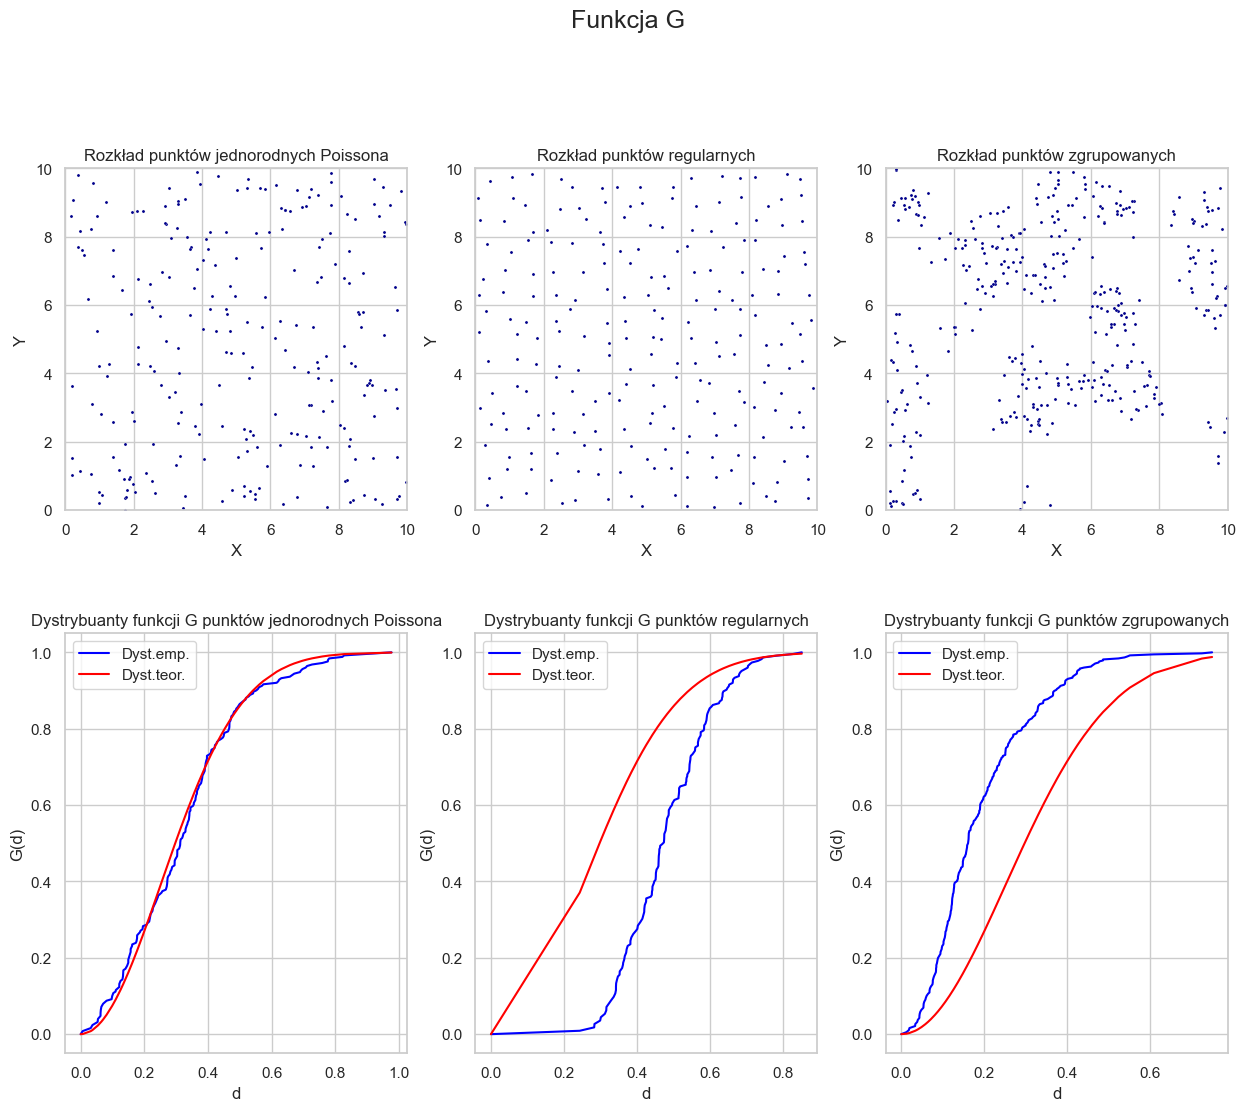

In [8]:
# YOUR CODE HERE
fig,ax = plt.subplots(2,3, figsize=(15,12))
fig.suptitle('Funkcja G', size=18)

sns.scatterplot(data=dhp, x='X', y='Y', color="darkblue", s=5, ax=ax[0][0])
sns.scatterplot(data=dr, x='X', y='Y', color="darkblue", s=5, ax=ax[0][1])
sns.scatterplot(data=dm, x='X', y='Y', color="darkblue", s=5, ax=ax[0][2])
sns.lineplot(data=g_dhp, x="D", y="G", color="blue", ax=ax[1][0], label='Dyst.emp.')
sns.lineplot(data=g_dhp_teor, x="D", y="G", color="red", ax=ax[1][0], label='Dyst.teor.')
sns.lineplot(data=g_dr, x="D", y="G", color="blue", ax=ax[1][1], label='Dyst.emp.')
sns.lineplot(data=g_dr_teor, x="D", y="G", color="red", ax=ax[1][1], label='Dyst.teor.')
sns.lineplot(data=g_dm, x="D", y="G", color="blue", ax=ax[1][2], label='Dyst.emp.')
sns.lineplot(data=g_dm_teor, x="D", y="G", color="red", ax=ax[1][2], label='Dyst.teor.')

ax[0][0].set_aspect(1)
ax[0][0].set_xlim(0,10)
ax[0][0].set_ylim(0,10)
ax[0][1].set_aspect(1)
ax[0][1].set_xlim(0,10)
ax[0][1].set_ylim(0,10)
ax[0][2].set_aspect(1)
ax[0][2].set_xlim(0,10)
ax[0][2].set_ylim(0,10)

ax[0][0].set_title('Rozkład punktów jednorodnych Poissona')
ax[0][1].set_title('Rozkład punktów regularnych')
ax[0][2].set_title('Rozkład punktów zgrupowanych')
ax[1][0].set_title('Dystrybuanty funkcji G punktów jednorodnych Poissona')
ax[1][1].set_title('Dystrybuanty funkcji G punktów regularnych')
ax[1][2].set_title('Dystrybuanty funkcji G punktów zgrupowanych')

#ax[1,0].plot(g_dhp['D'], g_dhp['G'], color='blue', label='Dystrubuanta Empiryczna')
#ax[1,0].plot(g_dhp_teor['D'], g_dhp_teor['G'], color='red', label='Dystrubuanta Teoretyczna')
#ax[1,0].legend(labelcolor="linecolor")
ax[1,0].set_xlabel('d')
ax[1,0].set_ylabel('G(d)')
ax[1,1].set_xlabel('d')
ax[1,1].set_ylabel('G(d)')
ax[1,2].set_xlabel('d')
ax[1,2].set_ylabel('G(d)')

### Zadanie 2: Funkcja F (25 pkt)

Przygotuj funkcję `f_function()`, która będzie generować dane niezbędne do wykonania wykresu funkcji F analizowanego rozkładu punktów oraz funkcję `f_function_poisson()`, która będzie generować  dane niezbędne do wykonania wykresu teoretycznej funkcji F jednorodnego rozkładu Poissona danej wzorem: <br/>
$F(d) = 1 - exp(-\lambda \pi d^2)$ <br/>
gdzie: $\lambda$ - intensywność procesu, $d$ - odległość.

Następnie wykorzystaj przygotowane funkcje do wygnenerowania danych dla wszystkich przygotowanych rozkładów punktów. 

Przedstaw wyniki analizy graficznie w postaci wykresów liniowych funkcji F przygotowanych rozkładów punktów zestawionych z teoretyczną funkcją F jednorodnego rozkładu Poissona o intensywności $2.5$. Zestaw wyniki na pojedynczej figurze (siatka wykresów 2x3). Umieść analizowane rozkłady punktów w górnym wierszu, a wykresy funkcji F w dolnym wierszu figury. <br/>
Uwaga! Porównywane wykresy funkcji F powinny zaczynać się od $d=0$ (co może wymagać uzupełnienia danych o 0 w obrębie funkcji `f_function()`) i kończyć na wartości $d$, dla której funkcja F analizowanego rozkładu punktów osiąga wartość 1.

Algorytm postępowania:
1) Z wykorzystaniem procesu regularnego lub jednorodnego procesu Poissona generujemy w obrębie analizowanego rozkładu zestaw punktów pomiarowych.
2) Dla każdego z punktów rozkładu pomiarowego wyliczamy dystans do jego najbliższego sąsiada z analizowanego rozkładu $d_{min}$.
3) Konstruujemy funkcję F jako dystrybuantę rozkładu odległości: <br/>
    $F(d) = \frac{n_{d_{min} \le d}}{n}$  <br/>
    gdzie: $n_{d_{min} \le d}$ - liczba punktów rozkładu pomiarowego, dla których odległość do najbliższego sąsiada z analizowanego rozkładu $d_{min}$ jest mniejsza lub równa $d$, $n$ - liczba punktów rozkładu pomiarowego.
    
Uwaga! Liczba punktów rozkładu pomiarowego jest istotna i wpływa na dokładność rozwiązania.

#### a) Przygotowanie funkcji

In [9]:
def f_function(points, test_points):
    """
    Parameters
    -------
    points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów analizowanego rozkłądu opisane jako "X" i "Y".
    test_points: DataFrame
        Tablica zawierająca dwie kolumny ze współrzędnymi punktów pomiarowych, dla których mają zostać wyznaczone odległości
        do najbliższego sąsiada z analizowanego rozkładu opisane jako "X" i "Y".
    
    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """   
    # YOUR CODE HERE
    l = len(test_points['X'])
    dist_min = np.zeros(l)
    f = np.zeros(l)
    
    for i in range(l):
        #znajdź tablicę odległości punktów pomiarowych od danego p. testowego
        temp_x = (points['X']-test_points['X'][i])**2
        temp_y = (points['Y']-test_points['Y'][i])**2
        temp = (temp_x+temp_y)**0.5
        #wybierz minimum z tej tablicy
        dist_min[i]=min(temp)
    
    dist_min = np.sort(dist_min)
    l = len(np.unique(dist_min))+1 #żeby dodać 0 na początek danych
    d = np.zeros(l) #d[0] = 0
    n = np.zeros(l) #n[0] = 0
    f = np.zeros(l)
    
    c = 0
    for i in range(len(dist_min)):
        if d[c] != dist_min[i]:
            c+=1
            d[c]=dist_min[i]
            n[c]=1
        else:
            d[c]=dist_min[i]
            n[c]+=1
    
    s = 0
    t = sum(n)
    for i in range(len(d)):
        s += n[i]
        f[i] = s/t
    
    return pd.DataFrame({'D':d, 'F':f})
    
def f_function_poisson(d, intensity):
    """
    Parameters
    -------
    d: array
        Macierz zawierająca odległości, dla których ma zostać wyznaczona wartość funkcji F.
    intensity: float
        Liczba dodatnia określająca intensywność jednorodnego procesu Poissona.

    Returns
    -------
    f: DataFrame
        Tablica zawierająca dwie kolumny:
        - "D" - zawierającą unikalne wartości odległości do najbliższego sąsiada uszeregowane od najmniejszej do największej wartości, dla których wyliczone zostały wartości funkcji F,
        - "F" - zawierającą wyliczone wartości funkcji F.
    """  
    # YOUR CODE HERE
    return pd.DataFrame({'D':d, 'F':1-np.exp(-intensity*np.pi*d*d)})

#### b) Wygenerowanie danych

In [10]:
# YOUR CODE HERE
#raise NotImplementedError()
d = homogeneous_poisson_on_rectangle(10,[0,10],[0,10])

f_dhp = f_function(dhp, d)
f_dhp_teor = f_function_poisson(f_dhp['D'], 2.5)

f_dr = f_function(dr, d)
f_dr_teor = f_function_poisson(f_dr['D'], 2.5)

f_dm = f_function(dm, d)
f_dm_teor = f_function_poisson(f_dm['D'], 2.5)

#### c) Wizualizacja

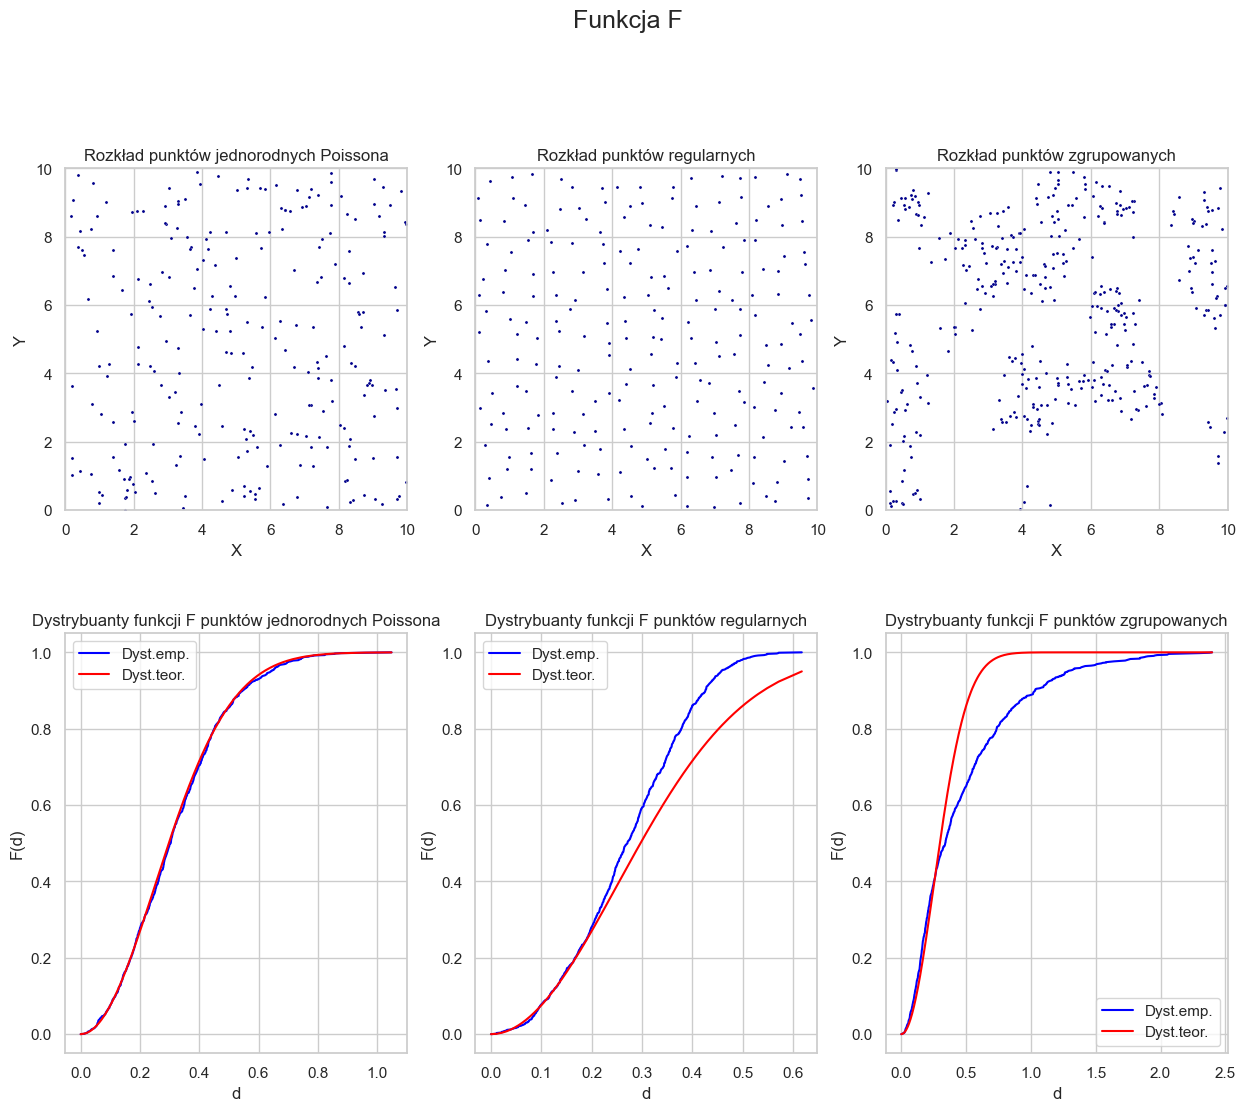

In [11]:
# YOUR CODE HERE
#raise NotImplementedError()
fig, ax = plt.subplots(2,3, figsize=(15,12))
fig.suptitle('Funkcja F', size=18)

sns.scatterplot(data=dhp, x='X', y='Y', color="darkblue", s=5, ax=ax[0][0])
sns.scatterplot(data=dr, x='X', y='Y', color="darkblue", s=5, ax=ax[0][1])
sns.scatterplot(data=dm, x='X', y='Y', color="darkblue", s=5, ax=ax[0][2])
sns.lineplot(data=f_dhp, x="D", y="F", color="blue", ax=ax[1][0], label='Dyst.emp.') #powinno być równo
sns.lineplot(data=f_dhp_teor, x="D", y="F", color="red", ax=ax[1][0], label='Dyst.teor.')
sns.lineplot(data=f_dr, x="D", y="F", color="blue", ax=ax[1][1], label='Dyst.emp.') #powinno być powyżej
sns.lineplot(data=f_dr_teor, x="D", y="F", color="red", ax=ax[1][1], label='Dyst.teor.')
sns.lineplot(data=f_dm, x="D", y="F", color="blue", ax=ax[1][2], label='Dyst.emp.') #powinno być poniżej
sns.lineplot(data=f_dm_teor, x="D", y="F", color="red", ax=ax[1][2], label='Dyst.teor.')

#l1,=ax[1][0].plot(f_dhp['D'],f_dhp['F'], linewidth=2)#labels: x='Odległość od sąsiada', y='Wartość dystrybuanty'
#l2,=ax[1][0].plot(f_dhp_teor['D'],f_dhp_teor['F'], linewidth=2)
#ax[1][0].legend([l1,l2], ['Emp.','Teor.'])

ax[0][0].set_aspect(1)
ax[0][0].set_xlim(0,10)
ax[0][0].set_ylim(0,10)
ax[0][1].set_aspect(1)
ax[0][1].set_xlim(0,10)
ax[0][1].set_ylim(0,10)
ax[0][2].set_aspect(1)
ax[0][2].set_xlim(0,10)
ax[0][2].set_ylim(0,10)

ax[0][0].set_title('Rozkład punktów jednorodnych Poissona')
ax[0][1].set_title('Rozkład punktów regularnych')
ax[0][2].set_title('Rozkład punktów zgrupowanych')
ax[1][0].set_title('Dystrybuanty funkcji F punktów jednorodnych Poissona')
ax[1][1].set_title('Dystrybuanty funkcji F punktów regularnych')
ax[1][2].set_title('Dystrybuanty funkcji F punktów zgrupowanych')

ax[1,0].set_xlabel('d')
ax[1,0].set_ylabel('F(d)')
ax[1,1].set_xlabel('d')
ax[1,1].set_ylabel('F(d)')
ax[1,2].set_xlabel('d')
ax[1,2].set_ylabel('F(d)')

plt.show()